In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
diabetes=pd.read_csv('/content/diabetes.csv')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
723,5,117,86,30,105,39.1,0.251,42,0
439,6,107,88,0,0,36.8,0.727,31,0
27,1,97,66,15,140,23.2,0.487,22,0
417,4,144,82,32,0,38.5,0.554,37,1
146,9,57,80,37,0,32.8,0.096,41,0


In [64]:
diabetes.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [65]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [66]:
diabetes1 = diabetes.drop("Outcome", axis=1)

In [67]:
print(diabetes1.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

In [68]:
Q1=diabetes1.quantile(0.25)
Q3=diabetes1.quantile(0.75)

In [69]:
Q1

,0.25
Pregnancies,1.00000
Glucose,99.00000
BloodPressure,62.00000
SkinThickness,0.00000
Insulin,0.00000
BMI,27.30000
DiabetesPedigreeFunction,0.24375
Age,24.00000


In [70]:
Q3

,0.75
Pregnancies,6.00000
Glucose,140.25000
BloodPressure,80.00000
SkinThickness,32.00000
Insulin,127.25000
BMI,36.60000
DiabetesPedigreeFunction,0.62625
Age,41.00000


In [71]:
IQR=Q3-Q1

In [72]:
IQR

,0
Pregnancies,5.0000
Glucose,41.2500
BloodPressure,18.0000
SkinThickness,32.0000
Insulin,127.2500
BMI,9.3000
DiabetesPedigreeFunction,0.3825
Age,17.0000


In [73]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit

,0
Pregnancies,-6.500
Glucose,37.125
BloodPressure,35.000
SkinThickness,-48.000
Insulin,-190.875
BMI,13.350
DiabetesPedigreeFunction,-0.330
Age,-1.500


In [74]:
upper_limit

,0
Pregnancies,13.500
Glucose,202.125
BloodPressure,107.000
SkinThickness,80.000
Insulin,318.125
BMI,50.550
DiabetesPedigreeFunction,1.200
Age,66.500


In [75]:
for col in diabetes1:
  outliers = diabetes1[(diabetes1[col] < lower_limit[col]) | (diabetes1[col] > upper_limit[col])]

In [76]:
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5,132,80,0,0,26.8,0.186,69
363,4,146,78,0,0,38.5,0.520,67
453,2,119,0,0,0,19.6,0.832,72
459,9,134,74,33,60,25.9,0.460,81
489,8,194,80,0,0,26.1,0.551,67
537,0,57,60,0,0,21.7,0.735,67
666,4,145,82,18,0,32.5,0.235,70
674,8,91,82,0,0,35.6,0.587,68
684,5,136,82,0,0,0.0,0.640,69


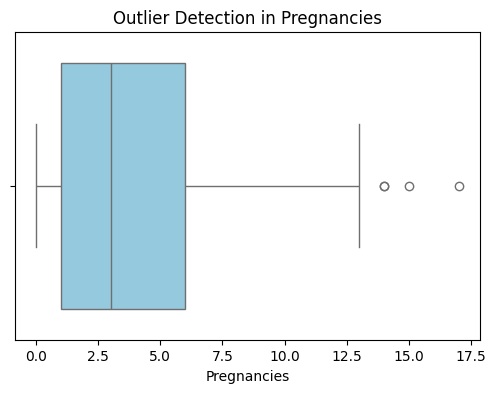

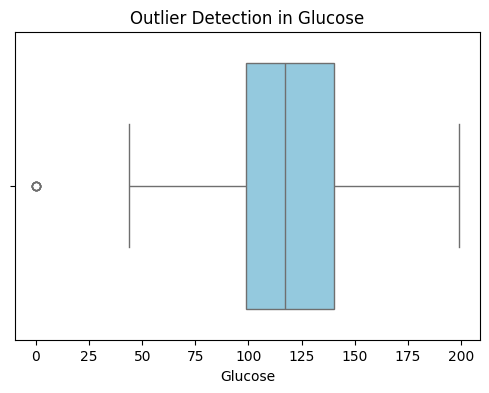

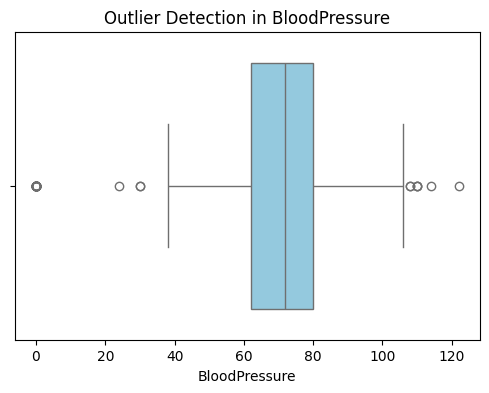

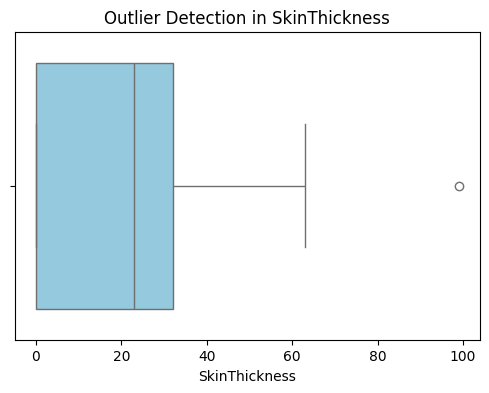

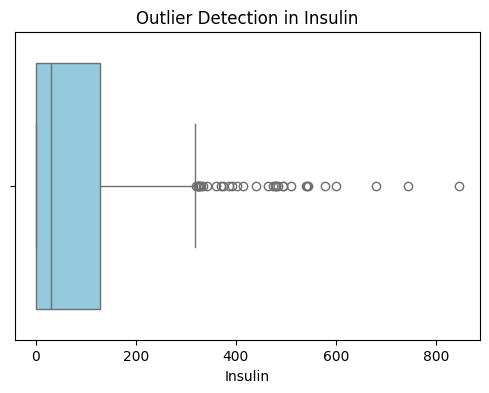

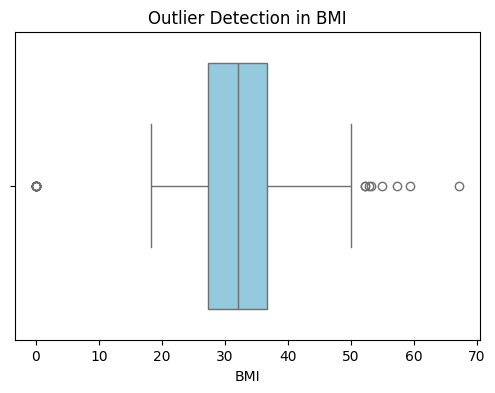

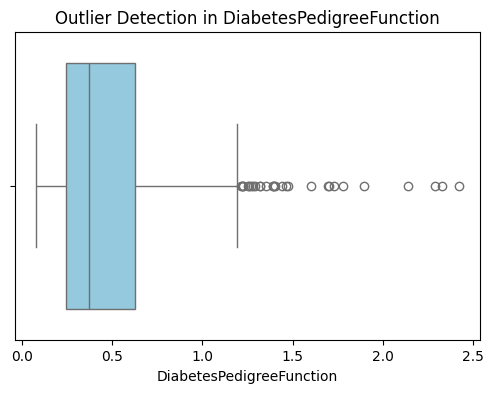

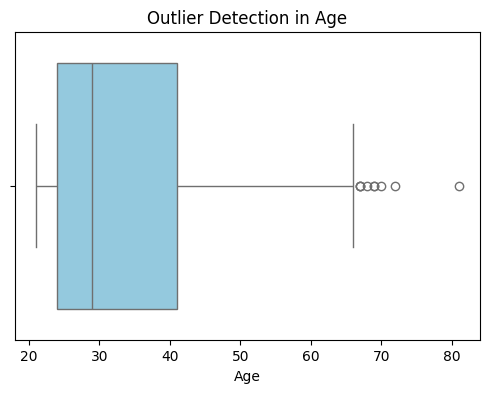

In [77]:
for col in diabetes1:
          plt.figure(figsize=(6,4))
          sns.boxplot(x=diabetes1[col], color='skyblue')
          plt.title(f"Outlier Detection in {col}")
          plt.show()

/tmp/ipython-input-2807747172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette='Set2')


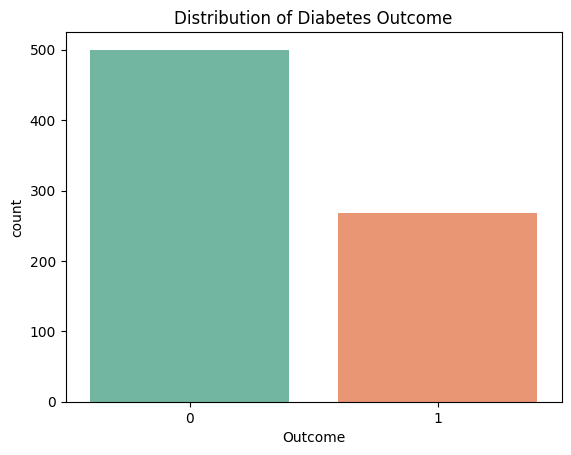

In [78]:
sns.countplot(x='Outcome', data=diabetes, palette='Set2')
plt.title("Distribution of Diabetes Outcome")
plt.show()

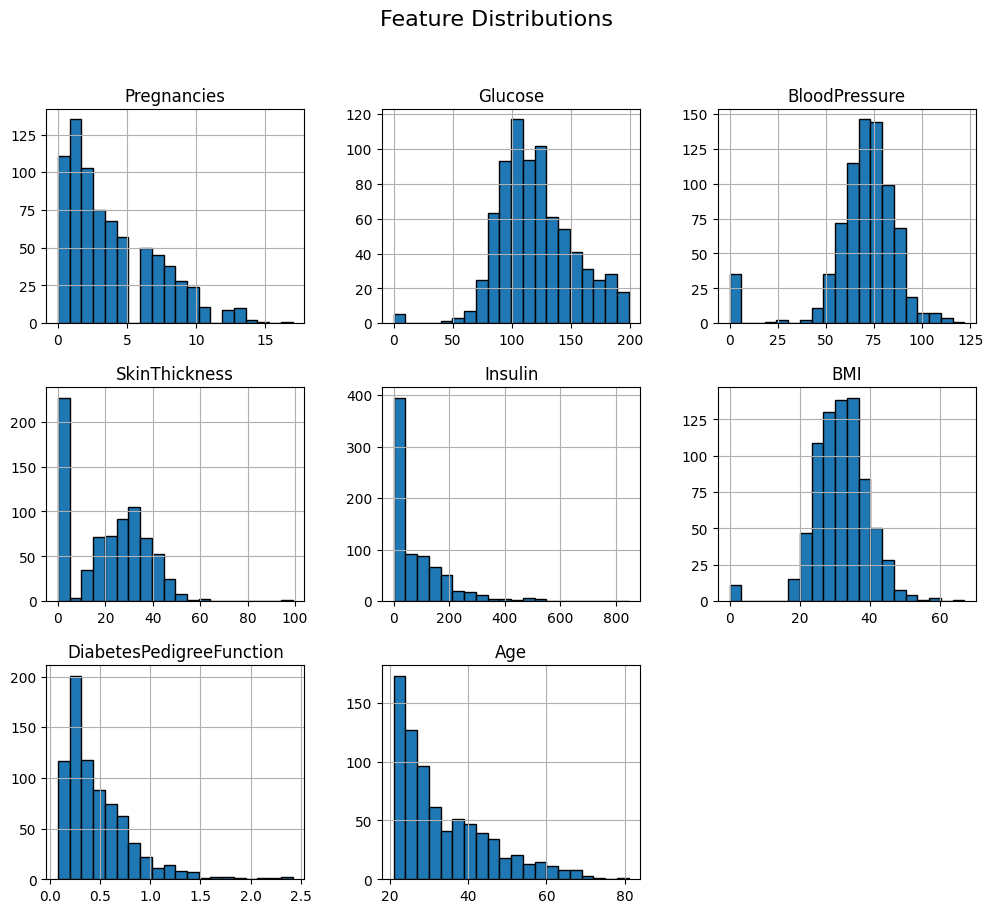

In [79]:
diabetes.drop(columns=['Outcome']).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [80]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


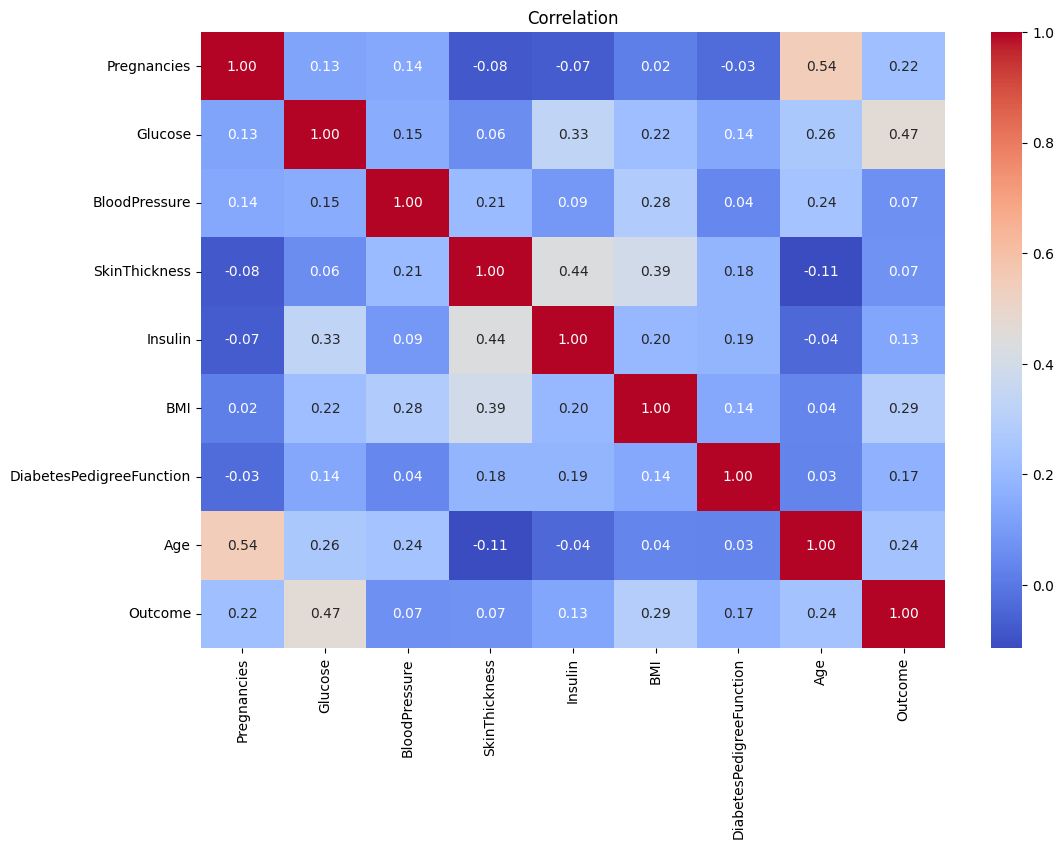

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation")
plt.show()

In [82]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [85]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [86]:
y_pred = model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [88]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[81 18]
 [24 31]]


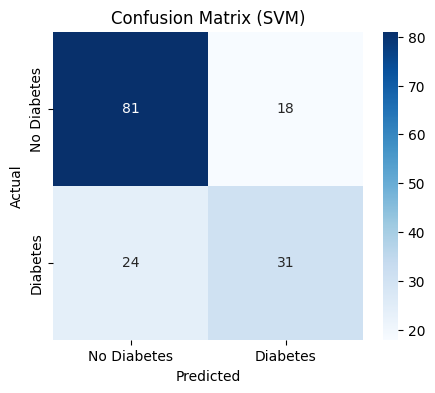

In [91]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [90]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

